In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/all_data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   15000 non-null  object
 1   Sentiment  15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB
None


,Sentence,Sentiment
0,valero energy corporation vlo set report quart...,negative
1,special feature form sec does require uniform ...,neutral
2,POS_NUM_TOKEN european union slammed chipmaker...,negative
3,instructions use magec rods designed bracing s...,negative
4,mountain view calif ap google took step challe...,positive


In [3]:
df.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

# Y distribution

<Axes: xlabel='Sentiment', ylabel='count'>

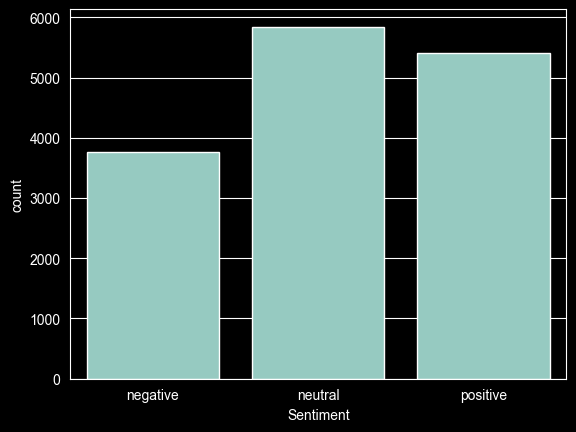

In [4]:
sns.countplot(data=df, x="Sentiment")

In [5]:
df["word_count"] = df["Sentence"].apply(lambda x: len(x.split()))

<Axes: xlabel='Sentiment', ylabel='word_count'>

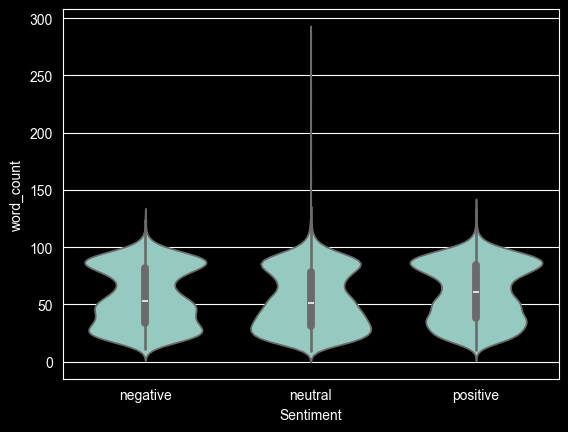

In [6]:
sns.violinplot(data=df, x="Sentiment", y="word_count")

In [7]:
grouped_df = df.groupby(by="Sentiment")
freq_df = pd.DataFrame()

for sentiment, group in grouped_df:
    grouped_str = group['Sentence'].astype("string").str.cat(sep=". ")
    grouped_str_df = pd.Series(grouped_str.split()).apply(lambda x: x.lower())

    mask2 = lambda x: x.isalpha()
    grouped_str_df = grouped_str_df[grouped_str_df.apply(mask2)]

    frequencies = grouped_str_df.value_counts()
    freq_df[sentiment] = frequencies

freq_df.reset_index(names="word", inplace=True)
freq_df_long = freq_df.melt(id_vars='word', 
                  value_vars=['negative', 'neutral', 'positive'],
                  var_name='sentiment', 
                  value_name='frequency')
freq_df_long.sort_values("frequency")
print(freq_df)
print(freq_df_long)


WANTED_FREQ = 5
print(f"Number of words having frequency higher than '{WANTED_FREQ}': {[sum(freq_df[col] > WANTED_FREQ) for col in freq_df if col != "word"]}")


               word  negative  neutral  positive
0           company      2236   2995.0    3118.0
1              said      1567   1133.0    1890.0
2              year      1288    991.0    1963.0
3           million      1153    909.0    1564.0
4           billion       739    504.0    1105.0
...             ...       ...      ...       ...
21228            dx         1      9.0       5.0
21229          freq         1      NaN       NaN
21230         ameci         1      NaN       NaN
21231       shepell         1      2.0       1.0
21232  occupational         1      3.0       1.0

[21233 rows x 4 columns]
               word sentiment  frequency
0           company  negative     2236.0
1              said  negative     1567.0
2              year  negative     1288.0
3           million  negative     1153.0
4           billion  negative      739.0
...             ...       ...        ...
63694            dx  positive        5.0
63695          freq  positive        NaN
63696         ame

/var/folders/pz/49q3zg2s5712y3_8mhmdr5bc0000gn/T/ipykernel_38033/4065597113.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="negative", y="word", data=negative_freq_df[:20], palette="viridis")


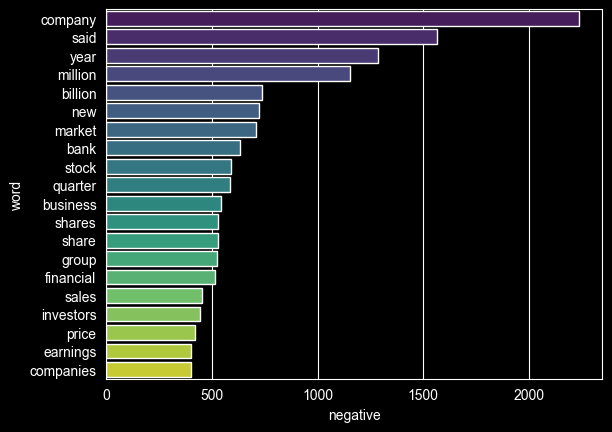

<Figure size 3200x1800 with 0 Axes>

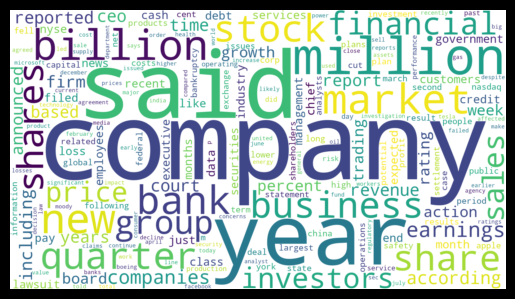

<Figure size 3200x1800 with 0 Axes>

In [8]:
from wordcloud import WordCloud

negative_freq_df = freq_df[["word", "negative"]].sort_values("negative", ascending=False)
sns.barplot(x="negative", y="word", data=negative_freq_df[:20], palette="viridis")
plt.show()

negative_cloud_dct = dict(negative_freq_df.set_index("word")["negative"])
negative_cloud = WordCloud(
    width=1600,
    height=900,
    background_color="white",
    colormap="viridis"
).generate_from_frequencies(negative_cloud_dct)
plt.imshow(negative_cloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(32,18))

/var/folders/pz/49q3zg2s5712y3_8mhmdr5bc0000gn/T/ipykernel_38033/3619050472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="positive", y="word", data=positive_freq_df[:20], palette="viridis")


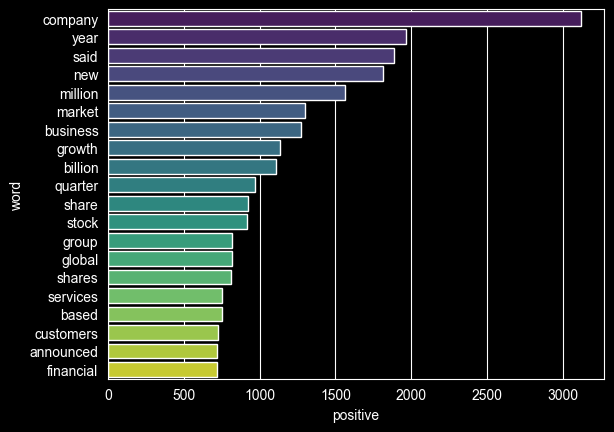

<Figure size 3200x1800 with 0 Axes>

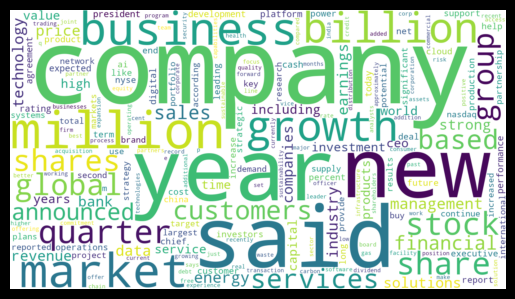

<Figure size 3200x1800 with 0 Axes>

In [9]:
positive_freq_df = freq_df[["word", "positive"]].sort_values("positive", ascending=False)
sns.barplot(x="positive", y="word", data=positive_freq_df[:20], palette="viridis")
plt.show()

positive_cloud_dct = dict(positive_freq_df.set_index("word")["positive"])
positive_cloud = WordCloud(
    width=1600,
    height=900,
    background_color="white",
    colormap="viridis"
).generate_from_frequencies(positive_cloud_dct)
plt.imshow(positive_cloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(32,18))

/var/folders/pz/49q3zg2s5712y3_8mhmdr5bc0000gn/T/ipykernel_38033/2012778597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="neutral", y="word", data=neutral_freq_df[:20], palette="viridis")


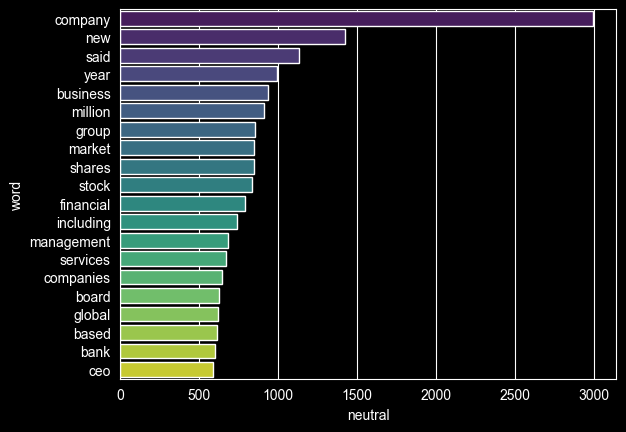

<Figure size 3200x1800 with 0 Axes>

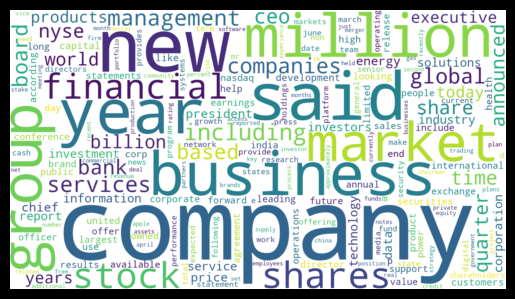

<Figure size 3200x1800 with 0 Axes>

In [10]:
neutral_freq_df = freq_df[["word", "neutral"]].sort_values("neutral", ascending=False)
sns.barplot(x="neutral", y="word", data=neutral_freq_df[:20], palette="viridis")
plt.show()

neutral_cloud_dct = dict(neutral_freq_df.set_index("word")["neutral"])
neutral_cloud = WordCloud(
    width=1600,
    height=900,
    background_color="white",
    colormap="viridis"
).generate_from_frequencies(neutral_cloud_dct)
plt.imshow(neutral_cloud, interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(32,18))
